# I] Import functions and options

In [2]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})
from matplotlib_venn import venn2

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [4]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [5]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/dataframes_for_input/"
ensembl_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_atg7_proteinGE.tsv", sep = "\t")
ensembl_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_atg7_proteinGE.tsv", sep = "\t")

print(ensembl_normal_atg7_proteinGE.shape)
print(ensembl_primary_atg7_proteinGE.shape)
ensembl_normal_atg7_proteinGE.head(2)

(7429, 19387)
(9185, 19387)
Wall time: 3min 34s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.694,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.177,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167


In [6]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 35.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and all protein coding 

In [7]:
ensembl_normal_atg7_proteinGE.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.6940,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.1770,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167
2,Normal Tissue,Muscle,3.909,2.602,1.345,14.2878,14.1511,14.3722,13.8211,14.8161,...,9.0646,5.9750,5.1173,1.8683,4.6136,5.0090,2.0604,5.7848,1.7489,4.6514
3,Normal Tissue,Muscle,3.854,2.568,1.428,13.8853,14.2716,15.1167,14.0622,15.5897,...,9.2252,5.4941,5.5880,-0.4521,5.6631,6.3797,2.5683,7.3214,1.6140,1.5563
4,Normal Tissue,Muscle,3.822,2.164,1.293,12.9986,13.7570,14.4661,13.4082,14.0564,...,8.9779,6.1502,5.1330,2.0289,6.8202,6.1789,1.8524,6.7685,2.8838,1.8323


In [ ]:
%%time
# Spearman Correlation, all genes WITHOUT cutoff
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal_Tissues'], [ensembl_primary_atg7_proteinGE,'Primary_Tumors']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []
all_negativ_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2.3 (= 5 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:2])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2.3]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 5tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < 0:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(ensembl_gene_id= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)
    
    #save positive
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_all/'
#     df_positiv_corr.to_excel(output_file_directory+path+positiv_corr+'.xlsx', index=False)
    
    df_negativ_corr['info'] = tissue[1]+'_'+isoform
    df_negativ_corr = protein_coding_list.merge(df_negativ_corr)
    df_negativ_corr = df_negativ_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_negativ_corr = df_negativ_corr.sort_values(['r_value'], ascending = False)
    
    #save negative
#     df_negativ_corr.to_excel(output_file_directory+path+negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
    all_negativ_corr_spearman.append(df_negativ_corr)
  print()

Normal_Tissues (7429, 19387)
number of genes removed: 943
the minimum of TPM is 2.3019
nombre genes after removing < 5tpm (7429, 18443)
ATG7_1
pos_spearman_corr_Normal_Tissues_ATG7_1 (17880, 3)
neg_spearman_corr_Normal_Tissues_ATG7_1 (560, 3)
ATG7_2
pos_spearman_corr_Normal_Tissues_ATG7_2 (10784, 3)
neg_spearman_corr_Normal_Tissues_ATG7_2 (7656, 3)

Primary_Tumors (9185, 19387)


## 1) Distribution of all rvalue to select cutoff

In [ ]:
%%time
#Merge Negative and Positive data
data =  [
         [all_negativ_corr_spearman[0], all_positiv_corr_spearman[0], 'Normal Tissue, ATG7(1)'], 
         [all_negativ_corr_spearman[1], all_positiv_corr_spearman[1], 'Normal Tissue, ATG7(2)'],
         [all_negativ_corr_spearman[2], all_positiv_corr_spearman[2], 'Primary Tumor, ATG7(1)'], 
         [all_negativ_corr_spearman[3], all_positiv_corr_spearman[3], 'Primary Tumor, ATG7(2)']
         ]

all_corr_negpos_merged = []
for dfs in data:
  print(dfs[2])
  print('shape positiv', dfs[0].shape)
  print('shape negativ', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_negpos_merged.append(df_merged)
  print()

all_corr_negpos_merged[1]

shape normal (18571, 5)
shape primary (18571, 5)
shape after merge (37142, 5)

shape normal (18674, 5)
shape primary (18674, 5)
shape after merge (37348, 5)



findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


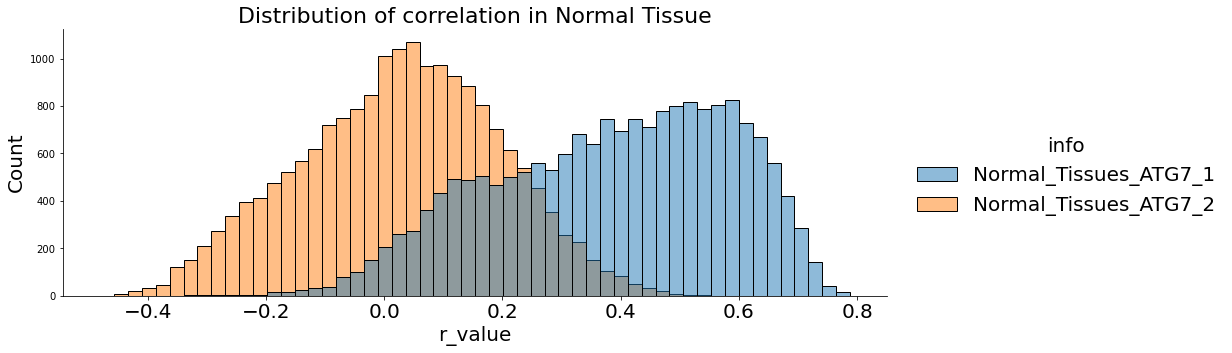

<Figure size 864x576 with 0 Axes>

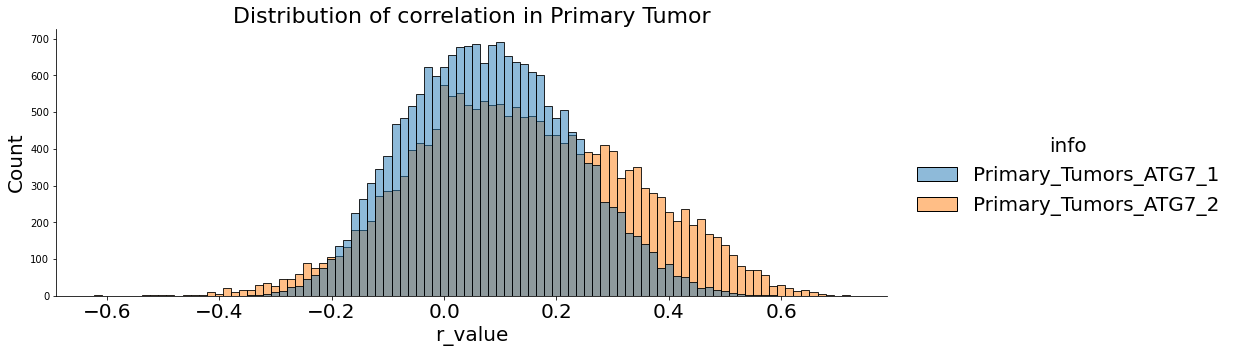

<Figure size 864x576 with 0 Axes>

In [9]:
#Merge ATG7(1) and ATG7(2)
data = [
        [all_corr_negpos_merged[0], all_corr_negpos_merged[1], 'Normal Tissue'],
        [all_corr_negpos_merged[2], all_corr_negpos_merged[3], 'Primary Tumor']
        ]

all_corr_isoforms_merged = []
for dfs in data:
  print('shape normal', dfs[0].shape)
  print('shape primary', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_isoforms_merged.append(df_merged)
  print()

#Distribution of correlation
data = [
        [all_corr_isoforms_merged[0], 'Normal Tissue'],
        [all_corr_isoforms_merged[1], 'Primary Tumor']
        ]

for dfs in data:
  seaborn.displot(dfs[0], x="r_value", hue='info', aspect = 2.6)
  label_title = 'Distribution of correlation in ' + dfs[1]
  plt.title(label_title, fontsize = 22)
  plt.show()
  plt.clf()
  print()

In [ ]:
# have to select the 1% in extremities to have only the interesting one.
## all_corr_negpos_merged = norm iso1, norm iso2, prim iso1, prim iso2

all_corr_negpos_extremities = []

for df in all_corr_negpos_merged:
  df = df.sort_values(['r_value'], ascending = False)
  df = df.reset_index(drop = True)
  
  lenght = len(df)
  only_1perc = int(lenght*0.01)
  just_head = only_1perc
  just_tail = lenght - only_1perc

  df_head = df.iloc[0:just_head,:]
  df_tail = df.iloc[just_tail:,:]
  df_extremeties = pandas.concat([df_head, df_tail], axis=0)

  inform = df['info'][1]
  extremities_name = 'corr_1%extremities'+ '_' +inform
#   df_extremeties.to_excel(extremities_name+'.xlsx', index=False)

  all_corr_negpos_extremities.append(df_extremeties)
    
all_corr_negpos_extremities[3]

# IV] Heatmap recap 

In [67]:
all_corr_negpos_ = []

for df in all_corr_negpos_merged:
    df2 = (df.dropna(subset=['ensembl_gene_id'])
             .set_index('ensembl_gene_id').sort_index())
    
    colname = df['info'][0]
    df2 = ( df2.rename(columns = {'r_value' : colname})
            .drop(df2.columns[[0, 2, 3]], axis=1) 
            .fillna(0))
    
    all_corr_negpos_.append(df2)

#merge the df     
df_heatmap_norm = pandas.concat([all_corr_negpos_[0], all_corr_negpos_[1]], axis=1)

df_heatmap_prim = pandas.concat([all_corr_negpos_[2], all_corr_negpos_[3]], axis=1)
df_heatmap_prim


,Primary_Tumors_ATG7_1,Primary_Tumors_ATG7_2
ensembl_gene_id,,
ENSG00000000003,0.018697,0.088473
ENSG00000000005,0.179211,0.002355
ENSG00000000419,-0.074191,0.353140
ENSG00000000457,0.004790,0.438936
ENSG00000000460,-0.049927,0.404877
...,...,...
ENSG00000282278,-0.078699,0.156917
ENSG00000282301,-0.138885,0.024306
ENSG00000282608,0.350485,0.162312


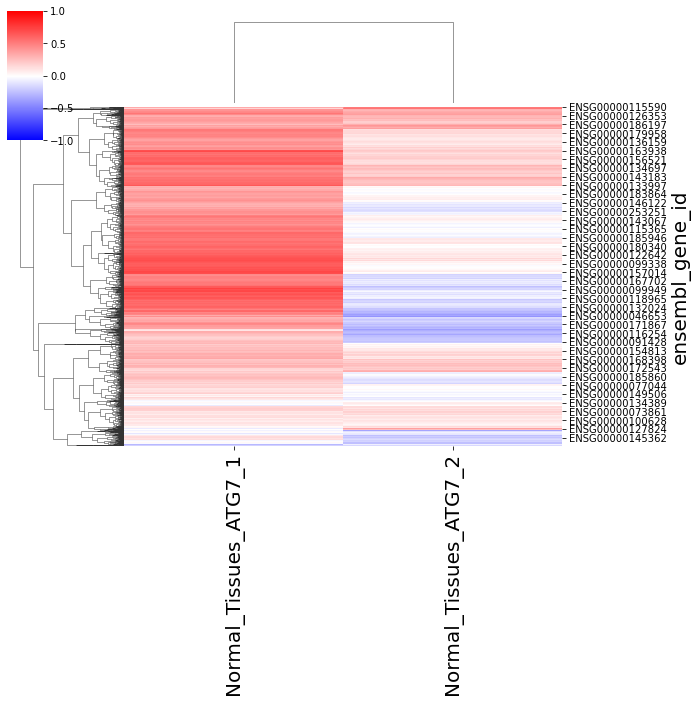

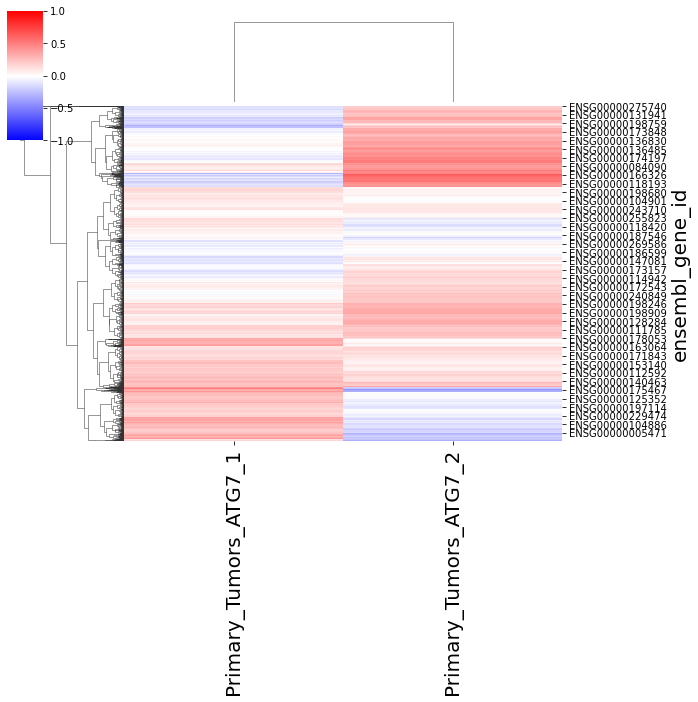

In [71]:
path = 'ATG7/Correlation/figures_correlation/'

seaborn.clustermap(df_heatmap_norm, vmin=-1, vmax=1, cmap = 'bwr')
plt.savefig(output_file_directory+path+'heatmap_corr_normal.svg')

seaborn.clustermap(df_heatmap_prim, vmin=-1, vmax=1, cmap = 'bwr')
plt.savefig(output_file_directory+path+'heatmap_corr_primary.svg')

In [ ]:
path = 'ATG7/Correlation/figures_correlation/'

seaborn.clustermap(df_heatmap_norm, vmin=-1, vmax=1, cmap = 'bwr')
# plt.savefig(output_file_directory+path+'heatmap_corr_normal.svg')

seaborn.clustermap(df_heatmap_prim, vmin=-1, vmax=1, cmap = 'bwr')
# plt.savefig(output_file_directory+path+'heatmap_corr_primary.svg')

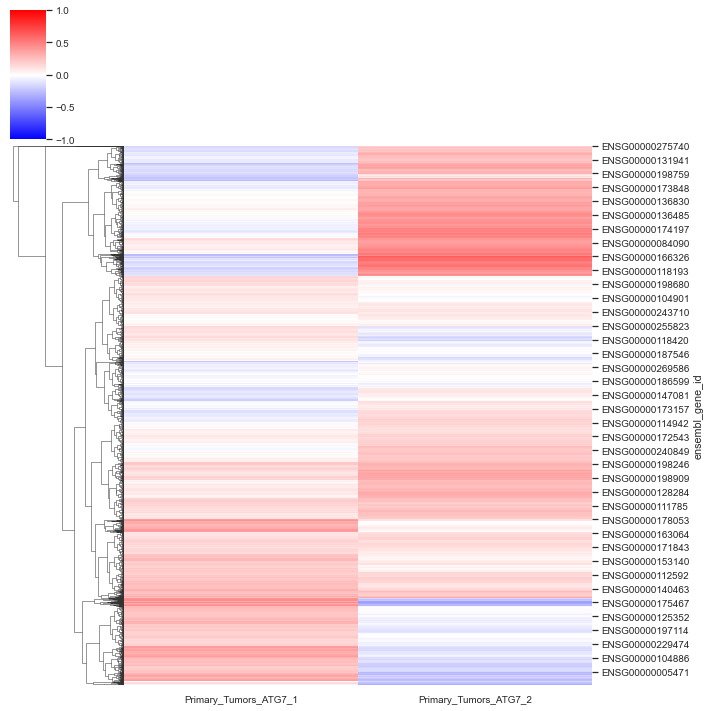

In [76]:
seaborn.set(font_scale=0.9)
seaborn.clustermap(df_heatmap_prim, cmap='bwr', col_cluster=False, vmin=-1, vmax=1)

In [1]:
linkage_method = 'complete'
distance_metric = 'dice'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df_heatmap_prim, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, 
                   method=linkage_method, metric=distance_metric)


NameError: name 'seaborn' is not defined

# V] Venn diagrams

In [56]:
all_corr_negpos_extremities[0]

,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000121775,TMEM39B,0.787757,0,Normal_Tissues_ATG7_1
1,ENSG00000230124,ACBD6,0.786925,0,Normal_Tissues_ATG7_1
2,ENSG00000230124,ACBD6,0.786925,0,Normal_Tissues_ATG7_1
3,ENSG00000197548,ATG7,0.785379,0,Normal_Tissues_ATG7_1
4,ENSG00000266173,STRADA,0.784712,0,Normal_Tissues_ATG7_1
...,...,...,...,...,...
18566,ENSG00000198712,MT-CO2,-0.310618,6.96362e-166,Normal_Tissues_ATG7_1
18567,ENSG00000198727,MT-CYB,-0.324487,1.05757e-181,Normal_Tissues_ATG7_1
18568,ENSG00000228253,MT-ATP8,-0.329243,2.52859e-187,Normal_Tissues_ATG7_1
18569,ENSG00000198899,MT-ATP6,-0.329694,7.33804e-188,Normal_Tissues_ATG7_1


In [36]:
len(all_corr_negpos_merged)

4

In [54]:
#separate pos and neg correlation
all_corr_positiv_extremities = []
all_corr_negativ_extremities = []

for df in all_corr_negpos_extremities:
    data_pos = df[df['r_value']>0]
    data_neg = df[df['r_value']<0]
    all_corr_positiv_extremities.append(data_pos)
    all_corr_negativ_extremities.append(data_neg)
print(len(all_corr_positiv_extremities))
all_corr_negativ_extremities[0].head()

4


,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
18386,ENSG00000196620,UGT2B15,-0.0723852,4.20704e-10,Normal_Tissues_ATG7_1
18387,ENSG00000079739,PGM1,-0.0724719,4.00974e-10,Normal_Tissues_ATG7_1
18388,ENSG00000235118,FAM237A,-0.072838,3.27184e-10,Normal_Tissues_ATG7_1
18389,ENSG00000250799,PRODH2,-0.0729181,3.12896e-10,Normal_Tissues_ATG7_1
18390,ENSG00000135636,DYSF,-0.073338,2.47422e-10,Normal_Tissues_ATG7_1


## 1) Venn diagrams of correlation of all the genes

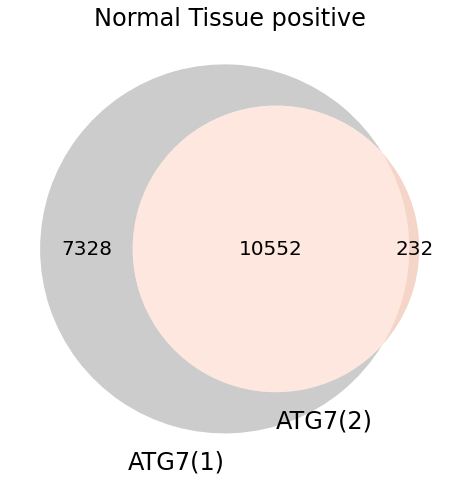

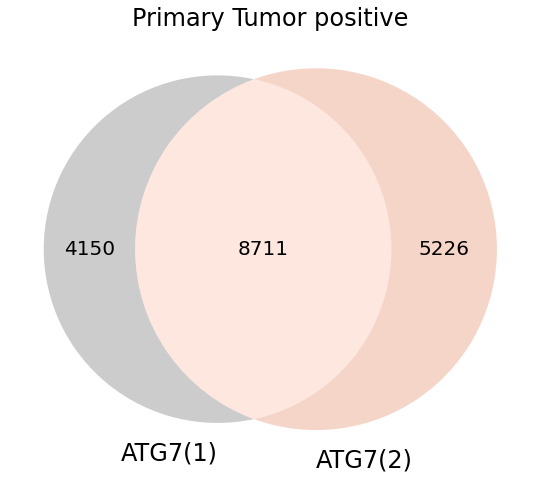

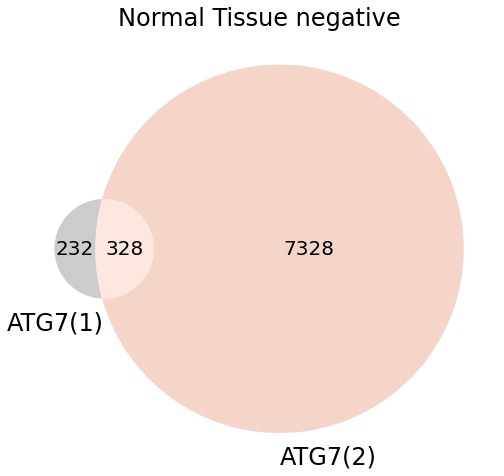

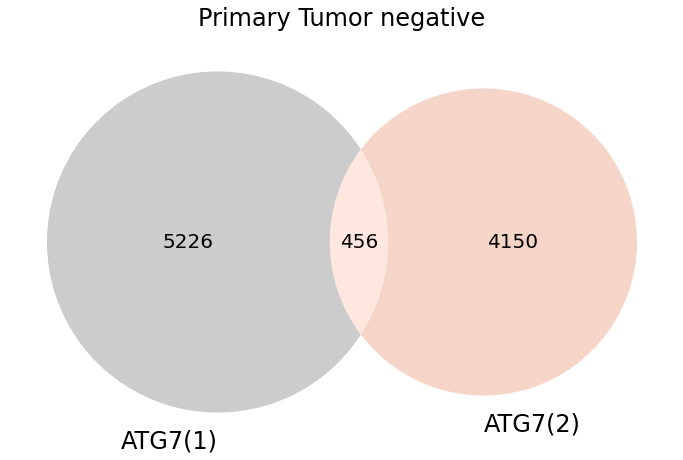

<Figure size 864x576 with 0 Axes>

In [44]:
#VENN DIAGRAMS ATG7(1) vs ATG7(2) FOR the 100% of the genes

data_pos =  [
         [all_positiv_corr_spearman[0], all_positiv_corr_spearman[1], 'Normal Tissue', 'positive'], 
         [all_positiv_corr_spearman[2], all_positiv_corr_spearman[3], 'Primary Tumor', 'positive']
         ]

data_neg =  [
         [all_negativ_corr_spearman[0], all_negativ_corr_spearman[1], 'Normal Tissue', 'negative'], 
         [all_negativ_corr_spearman[2], all_negativ_corr_spearman[3], 'Primary Tumor', 'negative']
         ]

data = data_pos + data_neg

list_only1 = []
list_only2 = []

for dfs in data:
  set1 = set(dfs[0]['ensembl_gene_id'])
  set2 = set(dfs[1]['ensembl_gene_id'])
  subset = (set1, set2)

  #just to save some results in list
  with_only1 = set2.symmetric_difference(set1) & set1
  list_only1.append(with_only1)

  with_only2 = set2.symmetric_difference(set1) & set2
  list_only2.append(with_only2)

  #Venn Diagram
  venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2] + ' ' + dfs[3]
  plt.title(label_title)
  plt.show()
  plt.clf()
  print()



## 2) Venn diagrams of the 1% the most correlated genes with the two isoforms for each tissue 

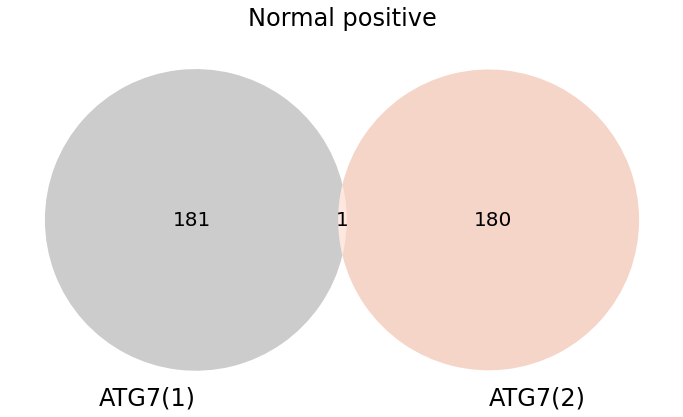

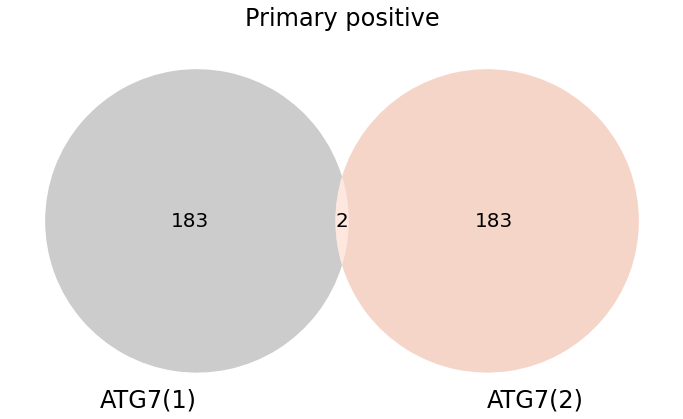

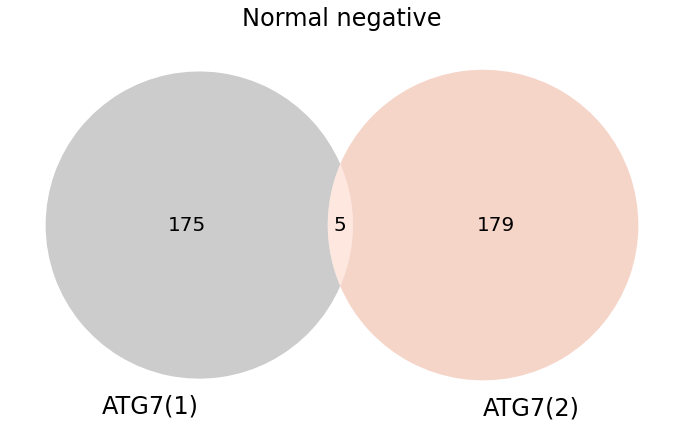

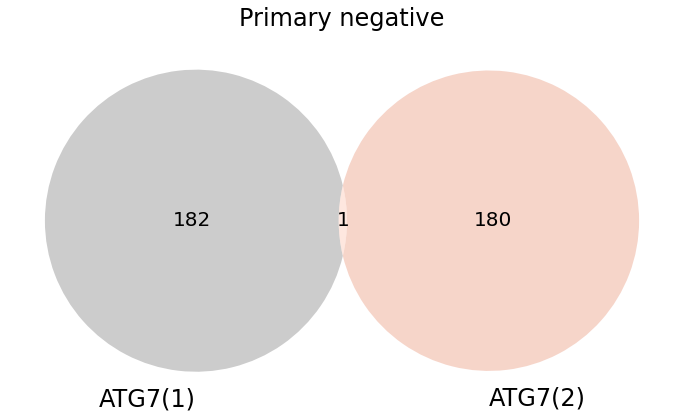

<Figure size 864x576 with 0 Axes>

In [67]:
#VENN DIAGRAMS ATG7(1)vs ATG7(2) FOR the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[1], 'Normal', 'positive'], 
         [all_corr_positiv_extremities[2], all_corr_positiv_extremities[3], 'Primary', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[1], 'Normal', 'negative'], 
         [all_corr_negativ_extremities[2], all_corr_negativ_extremities[3], 'Primary', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_only1 = list(set2.symmetric_difference(set1) & set1)
    with_only2 = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_ATG7_1 = with_only1, Only_ATG7_2 = with_only2, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_extremities/'
#     df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()

In [41]:
print(len(all_corr_negativ_extremities), 'iso1_norm, iso2_norm, iso1_prim, iso2_prim')

4 iso1_norm, iso2_norm, iso1_prim, iso2_prim


## 3) Venn diagrams of the 1% the most correlated genes for each isoform in normal and primary tissues

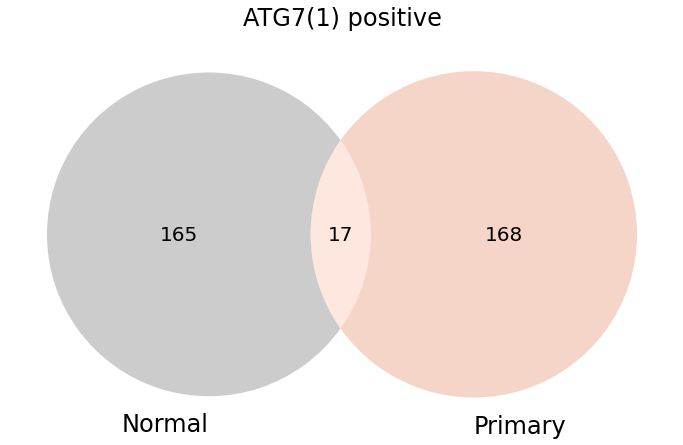

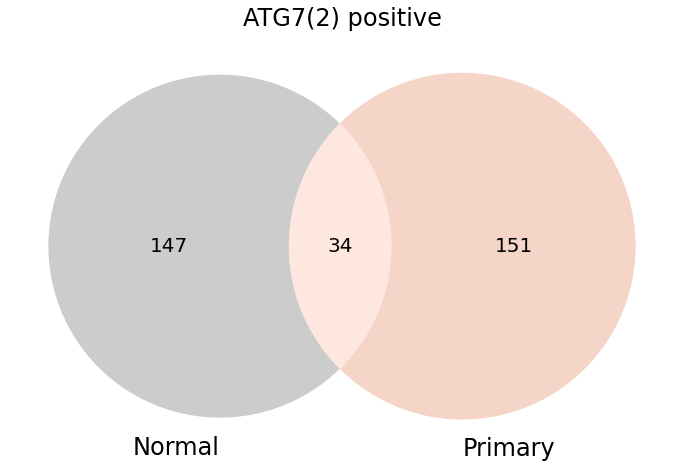

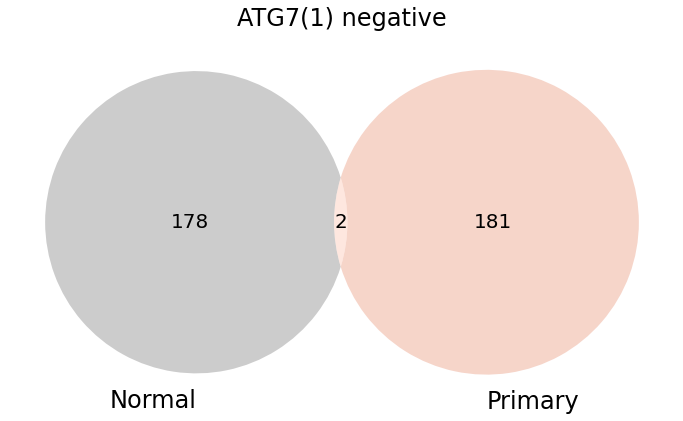

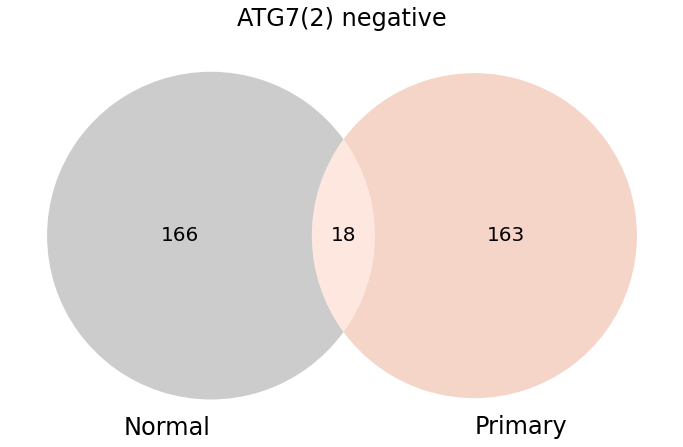

<Figure size 864x576 with 0 Axes>

In [66]:
#VENN DIAGRAMS FOR NORM vs PRIM for the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[2], 'ATG7(1)', 'positive'], 
         [all_corr_positiv_extremities[1], all_corr_positiv_extremities[3], 'ATG7(2)', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[2], 'ATG7(1)', 'negative'], 
         [all_corr_negativ_extremities[1], all_corr_negativ_extremities[3], 'ATG7(2)', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_normal = list(set2.symmetric_difference(set1) & set1)
    with_primary = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_normal = with_normal, Only_primary = with_primary, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_extremities/'
#     df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('Normal', 'Primary'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()